In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
!pip install statsmodels


In [9]:
from statsmodels.tsa.arima.model import ARIMA


In [11]:
df = pd.read_csv('/content/drive/MyDrive/modern_feminism_sentiment/data/processed/feminism_sentiment_trend.csv')


In [12]:
df.head()


,month,compound,rolling_avg
0,2018-04,0.098606,NaN
1,2018-05,0.083109,NaN
2,2018-06,0.089896,0.090537
3,2018-07,0.098908,0.090638
4,2018-08,0.084786,0.091197


In [13]:
df["month"] = pd.to_datetime(df["month"])
df = df.set_index("month")

ts = df["compound"]
ts.head()


,compound
month,
2018-04-01,0.098606
2018-05-01,0.083109
2018-06-01,0.089896
2018-07-01,0.098908
2018-08-01,0.084786


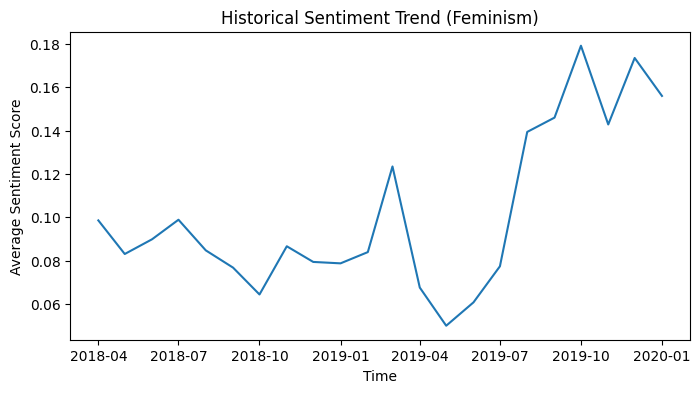

In [14]:
plt.figure(figsize=(8,4))
plt.plot(ts)
plt.title("Historical Sentiment Trend (Feminism)")
plt.xlabel("Time")
plt.ylabel("Average Sentiment Score")
plt.show()


In [15]:
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

In [16]:
forecast = model_fit.forecast(steps=6)
forecast


,predicted_mean
2020-02-01,0.165842
2020-03-01,0.158594
2020-04-01,0.163934
2020-05-01,0.160000
2020-06-01,0.162898
2020-07-01,0.160763


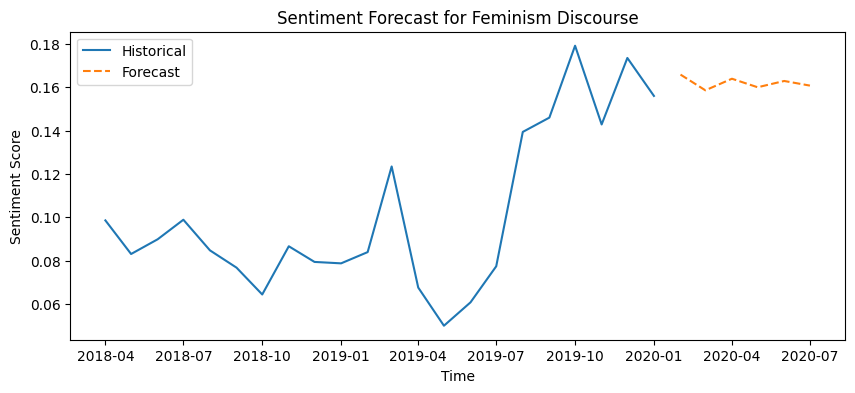

In [17]:
plt.figure(figsize=(10,4))
plt.plot(ts, label="Historical")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.title("Sentiment Forecast for Feminism Discourse")
plt.xlabel("Time")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()


In [18]:
forecast_df = forecast.reset_index()
forecast_df.columns = ["month", "forecast_sentiment"]

forecast_df.to_csv("feminism_sentiment_forecast.csv", index=False)
print("✅ feminism_sentiment_forecast.csv saved")


✅ feminism_sentiment_forecast.csv saved


In [19]:
ls

drive/  feminism_sentiment_forecast.csv  sample_data/
